In [524]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import xgboost


In [525]:
train = pd.read_csv('/home/hasan/DATA SET/Housing Price AdvanceRegression/train.csv')
testX = pd.read_csv('/home/hasan/DATA SET/Housing Price AdvanceRegression/test.csv')

In [526]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [527]:
testX.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [528]:
print('Shape of the train data :',train.shape)
print('Shape of the test data :',testX.shape)

Shape of the train data : (1460, 81)
Shape of the test data : (1459, 80)


# Adding train and test data together

In [529]:
#Seperating 'SalePrice' column from train dataset
trainX = train.drop('SalePrice', axis=1)
trainY = train['SalePrice'] 

In [530]:
print('Shape of trainX :',trainX.shape)
print('Shape of trinY :',trainY.shape)

Shape of trainX : (1460, 80)
Shape of trinY : (1460,)


In [531]:
#adding train,test dataset together
train_test = pd.concat([trainX,testX], axis=0)

In [532]:
train_test.shape

(2919, 80)

In [533]:
train_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

# Feature Engineering

In [534]:
#checking null value
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

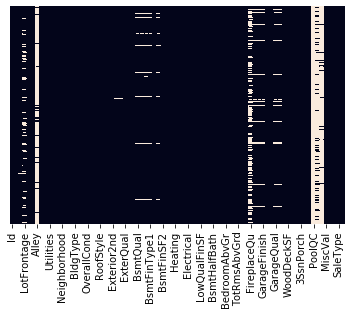

In [535]:
#vsualizing null value in graph
sns.heatmap(train_test.isnull(), yticklabels=False, cbar=False)

In [536]:
#handling null in MSZoning column
n_null = train_test['MSZoning'].isnull().sum()
print('Total null in MSZoning column :', n_null)

train_test['MSZoning'] = train_test['MSZoning'].fillna(train_test['MSZoning'].mode()[0])

Total null in MSZoning column : 4


In [537]:
#handling null in LotFrontage column
n_null = train_test['LotFrontage'].isnull().sum()
print('Total null in LotFrontage column :', n_null)

train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train_test['LotFrontage'].mean())

Total null in LotFrontage column : 486


In [538]:
#handling null in Alley column
train_test.drop('Alley', axis=1, inplace=True)

In [539]:
#handling null in Utilities column
n_null = train_test['Utilities'].isnull().sum()
print('Total null in Utilities column :', n_null)
train_test['Utilities'] = train_test['Utilities'].fillna(train_test['Utilities'].mode()[0])

Total null in Utilities column : 2


In [540]:
#handling null in Exterior1st column
n_null = train_test['Exterior1st'].isnull().sum()
print('Total null in Exterior1st column :', n_null)
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])

Total null in Exterior1st column : 1


In [541]:
#handling null in Exterior2nd column
n_null = train_test['Exterior2nd'].isnull().sum()
print('Total null in Exterior2nd column :', n_null)
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])

Total null in Exterior2nd column : 1


In [542]:
#handling null in MasVnrType column
n_null = train_test['MasVnrType'].isnull().sum()
print('Total null in MasVnrType column :', n_null)
train_test['MasVnrType'] = train_test['MasVnrType'].fillna(train_test['MasVnrType'].mode()[0])

Total null in MasVnrType column : 24


In [543]:
#handling null in MasVnrArea column
n_null = train_test['MasVnrArea'].isnull().sum()
print('Total null in MasVnrArea column :', n_null)
train_test['MasVnrArea'] = train_test['MasVnrArea'].fillna(train_test['MasVnrArea'].mode()[0])

Total null in MasVnrArea column : 23


In [544]:
#handling null in BsmtQual column
n_null = train_test['BsmtQual'].isnull().sum()
print('Total null in BsmtQual column :', n_null)
train_test['BsmtQual'] = train_test['BsmtQual'].fillna(train_test['BsmtQual'].mode()[0])

Total null in BsmtQual column : 81


In [545]:
#handling null in BsmtCond column
n_null = train_test['BsmtCond'].isnull().sum()
print('Total null in BsmtCond column :', n_null)
train_test['BsmtCond'] = train_test['BsmtCond'].fillna(train_test['BsmtCond'].mode()[0])

Total null in BsmtCond column : 82


In [546]:
#handling null in BsmtExposure column
n_null = train_test['BsmtExposure'].isnull().sum()
print('Total null in BsmtExposure column :', n_null)
train_test['BsmtExposure'] = train_test['BsmtExposure'].fillna(train_test['BsmtExposure'].mode()[0])

Total null in BsmtExposure column : 82


In [547]:
#handling null in BsmtFinType1 column
n_null = train_test['BsmtFinType1'].isnull().sum()
print('Total null in BsmtFinType1 column :', n_null)
train_test['BsmtFinType1'] = train_test['BsmtFinType1'].fillna(train_test['BsmtFinType1'].mode()[0])

Total null in BsmtFinType1 column : 79


In [548]:
#handling null in BsmtFinSF1 column
n_null = train_test['BsmtFinSF1'].isnull().sum()
print('Total null in BsmtFinSF1 column :', n_null)
train_test['BsmtFinSF1'] = train_test['BsmtFinSF1'].fillna(train_test['BsmtFinSF1'].mean())

Total null in BsmtFinSF1 column : 1


In [549]:
#handling null in BsmtFinType2 column
n_null = train_test['BsmtFinType2'].isnull().sum()
print('Total null in BsmtFinType2 column :', n_null)
train_test['BsmtFinType2'] = train_test['BsmtFinType2'].fillna(train_test['BsmtFinType2'].mode()[0])

Total null in BsmtFinType2 column : 80


In [550]:
#handling null in BsmtFinSF2 column
n_null = train_test['BsmtFinSF2'].isnull().sum()
print('Total null in BsmtFinSF2 column :', n_null)
train_test['BsmtFinSF2'] = train_test['BsmtFinSF2'].fillna(train_test['BsmtFinSF2'].mean())

Total null in BsmtFinSF2 column : 1


In [551]:
#handling null in BsmtUnfSF column
n_null = train_test['BsmtUnfSF'].isnull().sum()
print('Total null in BsmtUnfSF column :', n_null)
train_test['BsmtUnfSF'] = train_test['BsmtUnfSF'].fillna(train_test['BsmtUnfSF'].mean())

Total null in BsmtUnfSF column : 1


In [552]:
#handling null in TotalBsmtSF column
n_null = train_test['TotalBsmtSF'].isnull().sum()
print('Total null in TotalBsmtSF column :', n_null)
train_test['TotalBsmtSF'] = train_test['TotalBsmtSF'].fillna(train_test['TotalBsmtSF'].mean())

Total null in TotalBsmtSF column : 1


In [553]:
#handling null in Electrical column
n_null = train_test['Electrical'].isnull().sum()
print('Total null in Electrical column :', n_null)
train_test['Electrical'] = train_test['Electrical'].fillna(train_test['Electrical'].mode()[0])

Total null in Electrical column : 1


In [554]:
#handling null in BsmtFullBath column
n_null = train_test['BsmtFullBath'].isnull().sum()
print('Total null in BsmtFullBath column :', n_null)
train_test['BsmtFullBath'] = train_test['BsmtFullBath'].fillna(train_test['BsmtFullBath'].mean())

Total null in BsmtFullBath column : 2


In [555]:
#handling null in BsmtHalfBath column
n_null = train_test['BsmtHalfBath'].isnull().sum()
print('Total null in BsmtHalfBath column :', n_null)
train_test['BsmtHalfBath'] = train_test['BsmtHalfBath'].fillna(train_test['BsmtHalfBath'].mean())

Total null in BsmtHalfBath column : 2


In [556]:
#handling null in KitchenQual column
n_null = train_test['KitchenQual'].isnull().sum()
print('Total null in KitchenQual column :', n_null)
train_test['KitchenQual'] = train_test['KitchenQual'].fillna(train_test['KitchenQual'].mode()[0])

Total null in KitchenQual column : 1


In [557]:
#handling null in Functional column
n_null = train_test['Functional'].isnull().sum()
print('Total null in Functional column :', n_null)
train_test['Functional'] = train_test['Functional'].fillna(train_test['Functional'].mode()[0])

Total null in Functional column : 2


In [558]:
#handling null in FireplaceQu column
n_null = train_test['FireplaceQu'].isnull().sum()
print('Total null in FireplaceQu column :', n_null)
train_test['FireplaceQu'] = train_test['FireplaceQu'].fillna(train_test['FireplaceQu'].mode()[0])

Total null in FireplaceQu column : 1420


In [559]:
#handling null in GarageType column
n_null = train_test['GarageType'].isnull().sum()
print('Total null in GarageType column :', n_null)
train_test['GarageType'] = train_test['GarageType'].fillna(train_test['GarageType'].mode()[0])

Total null in GarageType column : 157


In [560]:
#handling null in GarageYrBlt column
n_null = train_test['GarageYrBlt'].isnull().sum()
print('Total null in GarageYrBlt column :', n_null)
train_test['GarageYrBlt'] = train_test['GarageYrBlt'].fillna(train_test['GarageYrBlt'].mean())

Total null in GarageYrBlt column : 159


In [561]:
#handling null in GarageFinish column
n_null = train_test['GarageFinish'].isnull().sum()
print('Total null in GarageFinish column :', n_null)
train_test['GarageFinish'] = train_test['GarageFinish'].fillna(train_test['GarageFinish'].mode()[0])

Total null in GarageFinish column : 159


In [562]:
#handling null in GarageCars column
n_null = train_test['GarageCars'].isnull().sum()
print('Total null in GarageCars column :', n_null)
train_test['GarageCars'] = train_test['GarageCars'].fillna(train_test['GarageCars'].mean())

Total null in GarageCars column : 1


In [563]:
#handling null in GarageArea column
n_null = train_test['GarageArea'].isnull().sum()
print('Total null in GarageArea column :', n_null)
train_test['GarageArea'] = train_test['GarageArea'].fillna(train_test['GarageArea'].mean())

Total null in GarageArea column : 1


In [564]:
#handling null in GarageQual column
n_null = train_test['GarageQual'].isnull().sum()
print('Total null in GarageQual column :', n_null)
train_test['GarageQual'] = train_test['GarageQual'].fillna(train_test['GarageQual'].mode()[0])

Total null in GarageQual column : 159


In [565]:
#handling null in GarageCond column
n_null = train_test['GarageCond'].isnull().sum()
print('Total null in GarageCond column :', n_null)
train_test['GarageCond'] = train_test['GarageCond'].fillna(train_test['GarageCond'].mode()[0])

Total null in GarageCond column : 159


In [566]:
train_test.drop(['PoolQC','Fence','MiscFeature','Id'], axis=1, inplace=True)

In [567]:
#handling null in SaleType column
n_null = train_test['SaleType'].isnull().sum()
print('Total null in SaleType column :', n_null)
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])

Total null in SaleType column : 1


In [568]:
#checking null value
train_test.isnull().values.any()

False

In [569]:
#After null value cleaning
train_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [570]:
train_test.shape

(2919, 75)

# Converting to OneHotEncoding 

In [571]:
#categorical column name
columns = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
           'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
           'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
           'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
           'HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
           'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [572]:
def converting_to_onehotencoding(columns):
    data = train_test
    
    for c in columns:
        dummy_data = pd.get_dummies(train_test[c], drop_first=True)
        data = pd.concat([data, dummy_data], axis=1)
        
        data.drop(c, axis=1, inplace=True)
        
        
    return data
        
train_test = converting_to_onehotencoding(columns)

In [573]:
train_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [574]:
train_test.shape

(2919, 236)

In [575]:
df = train_test.iloc[:, ~train_test.columns.duplicated()]
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [576]:
df.shape

(2919, 176)

# Dividing dataset for Training and Testing

In [577]:
trainX = df.iloc[:1460,:]
testX = df.iloc[1460:,:]
print('Shape of trainX is :',trainX.shape)
print('Shape of trainY is :',trainY.shape)
print('Shape of testX is :',testX.shape)

Shape of trainX is : (1460, 176)
Shape of trainY is : (1460,)
Shape of testX is : (1459, 176)


# Defining Algorithm

In [578]:
model = RandomForestRegressor(n_estimators=100)
model.fit(trainX,trainY)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [579]:
predict = model.predict(testX)

In [580]:
predict

array([126825.61, 154452.5 , 178341.1 , ..., 158462.87, 117460.  ,
       231861.98])

# cross_val_score in train data

In [581]:
cvs = cross_val_score(model,trainX,trainY, cv=5)
cvs

array([0.86696066, 0.84389564, 0.87819997, 0.87739938, 0.81927206])

In [582]:
cvs.mean()

0.8571455409985724

# Hyperparameter Tuning 

In [583]:
classifier=xgboost.XGBRegressor()
regressor=xgboost.XGBRegressor()

In [584]:
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

In [585]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, 
            n_iter=50,
            scoring = 'neg_mean_absolute_error',
            n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [586]:
random_cv.fit(trainX,trainY)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                              

In [587]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [588]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [589]:
regressor.fit(trainX,trainY)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [590]:
predict = regressor.predict(testX)
predict

array([117427.28, 162159.19, 185721.83, ..., 177089.06, 119173.38,
       233363.22], dtype=float32)

In [591]:
#cross_val_score in train data
cvs = cross_val_score(regressor, trainX,trainY,cv=5)
cvs

array([0.91569197, 0.85716126, 0.90997712, 0.88117432, 0.91097072])

In [592]:
cvs.mean()

0.8949950764558017